In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import string
sns.set(rc={'figure.figsize':(12,20)})


def print_dict(tree):
    tree_str = json.dumps(tree, indent=4)
    tree_str = tree_str.replace("\n    ", "\n")
    tree_str = tree_str.replace('"', "")
    tree_str = tree_str.replace(',', "")
    tree_str = tree_str.replace("{", "")
    tree_str = tree_str.replace("}", "")
    tree_str = tree_str.replace("    ", " | ")
    tree_str = tree_str.replace("  ", " ")

    print(tree_str)

def reindent(s, numSpaces):
    s = s.split('\n')
    s = [(numSpaces * ' ') + line for line in s]
    s = '\n'.join(s)
    return s

# Seleção de Características 

## 1 - PCA

A análise de componentes principais (PCA <i>Principal Component Analysis</i>) é uma técnica da estatística multivariada que consiste em transformar um conjunto de variáveis originais em outro conjunto de variáveis
de mesma dimensão chamadas de componentes principais.

Os componentes principais apresentam propriedades importantes:
<ul>
    <li>cada componente principal é uma combinação linear de todas as variáveis originais</li>
    <li>são independentes entre si e estimados com o propósito de reter, em ordem de estimação, o máximo de informação, em termos da variação total contida nos dados.</li>
</ul>

Do ponto de vista da álgebra linear, o PCA é uma transformação linear ortogonal, ou seja, que é uma transformação que <i>extrai</i> da matriz de entrada os autovetores que possuem a propriedade de serem linearmente independentes.

Para que isso seja possível para qualquer matriz não quadrada utilizamos uma técnica de fatoração chamada <b>Singular Value Decomposition (SVD)</b>

$$A_{m\times n} = U_{m \times m}\Sigma_{m \times n}V_{n \times n}^T$$

onde $U$ é uma matriz unitária $m\times m$ real ou complexa, $\Sigma$ é uma matriz retangular diagonal $m\times n$ com números reais não-negativos na diagonal, e $V*$ (a conjugada transposta de $V$) é uma matriz unitária $n\times n$ real ou complexa. Os valore de $\Sigma$ são os chamados valores singulares de $A$. As $m$ colunas de $U$ e as $n$ colunas de $V$ são os chamados vetores singulares à esquerda e vetores singulares à direita de $A$, respetivamente.

<img src="images/svd.png">

### 1.2 - Algoritmo 

Vamos partir de um exemplo simples, consideremos uma matriz M:

In [2]:
M = np.array([[1,2,3, 10, 6],[4,5,6, 11, 9], [7,8,9, 12, 10], [13, 14, 15, 16, 11], [19,4,2,10,-3]])
display(M)

array([[ 1,  2,  3, 10,  6],
       [ 4,  5,  6, 11,  9],
       [ 7,  8,  9, 12, 10],
       [13, 14, 15, 16, 11],
       [19,  4,  2, 10, -3]])

**1- Centralizar os valores na média.**

In [3]:
M_norm = M - M.mean(axis=0)
display(M_norm)

array([[-7.8, -4.6, -4. , -1.8, -0.6],
       [-4.8, -1.6, -1. , -0.8,  2.4],
       [-1.8,  1.4,  2. ,  0.2,  3.4],
       [ 4.2,  7.4,  8. ,  4.2,  4.4],
       [10.2, -2.6, -5. , -1.8, -9.6]])

**2-  Calcular a matriz de covariância da matriz original.**

In [4]:
cov = np.cov(M_norm.T)
display(cov)

array([[ 52.2 ,  11.4 ,   3.75,   4.2 , -23.1 ],
       [ 11.4 ,  21.8 ,  23.75,  11.4 ,  15.3 ],
       [  3.75,  23.75,  27.5 ,  12.75,  22.5 ],
       [  4.2 ,  11.4 ,  12.75,   6.2 ,   8.9 ],
       [-23.1 ,  15.3 ,  22.5 ,   8.9 ,  32.3 ]])

**3- Calcular os autovalores**

In [5]:
eigen_values, eigen_vectors = np.linalg.eig(cov.T)
print("Autovalores")
display(eigen_values)

print("Autovetores")
display(eigen_vectors)

Autovalores


array([ 7.53296710e+01,  6.40780308e+01,  5.66545876e-01,  2.57523310e-02,
       -9.32173351e-16])

Autovetores


array([[ 3.08524080e-01,  8.37492696e-01,  3.86466306e-01,
         1.99212635e-01, -1.19904115e-01],
       [-4.02194690e-01,  3.87137515e-01, -1.21849595e-01,
        -3.11190192e-01,  7.59392729e-01],
       [-5.35454460e-01,  3.02695918e-01, -2.17158826e-01,
        -4.06890722e-01, -6.39488614e-01],
       [-2.28195292e-01,  1.79439633e-01, -5.93588724e-01,
         7.50586939e-01,  1.32811282e-14],
       [-6.35820536e-01, -1.57819923e-01,  6.60523233e-01,
         3.66789008e-01,  7.06738836e-15]])

**3- Ordenar os Autovetores associados a cada autorvalor**

In [6]:
eigen_vectors = eigen_vectors.T
idxs = np.argsort(np.abs(eigen_values))[::-1]
eigen_vectors_tranposed_sorted = eigen_vectors[idxs]

display(eigen_vectors_tranposed_sorted)

array([[ 3.08524080e-01, -4.02194690e-01, -5.35454460e-01,
        -2.28195292e-01, -6.35820536e-01],
       [ 8.37492696e-01,  3.87137515e-01,  3.02695918e-01,
         1.79439633e-01, -1.57819923e-01],
       [ 3.86466306e-01, -1.21849595e-01, -2.17158826e-01,
        -5.93588724e-01,  6.60523233e-01],
       [ 1.99212635e-01, -3.11190192e-01, -4.06890722e-01,
         7.50586939e-01,  3.66789008e-01],
       [-1.19904115e-01,  7.59392729e-01, -6.39488614e-01,
         1.32811282e-14,  7.06738836e-15]])

**4 - Transformar os dados a partir dos autovetores ordenados**

In [7]:
n_components = 2

M_pca = np.dot(M_norm, eigen_vectors[0:n_components].T)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
M_pca_sklearn = pca.fit_transform(M)
df = pd.DataFrame(np.vstack((M_pca, M_pca_sklearn)),columns=['x','y'])
df['algorithm'] = ['simple_pca']*5 + ['sklearn_pca']*5
df

,x,y,algorithm
0,2.377669,-9.752359,simple_pca
1,-1.645363,-5.464400,simple_pca
2,-4.396754,-0.860802,simple_pca
3,-9.720106,8.863093,simple_pca
4,13.384553,7.214468,simple_pca
5,2.377669,9.752359,sklearn_pca
6,-1.645363,5.464400,sklearn_pca
7,-4.396754,0.860802,sklearn_pca
8,-9.720106,-8.863093,sklearn_pca
9,13.384553,-7.214468,sklearn_pca


<AxesSubplot:xlabel='x', ylabel='y'>

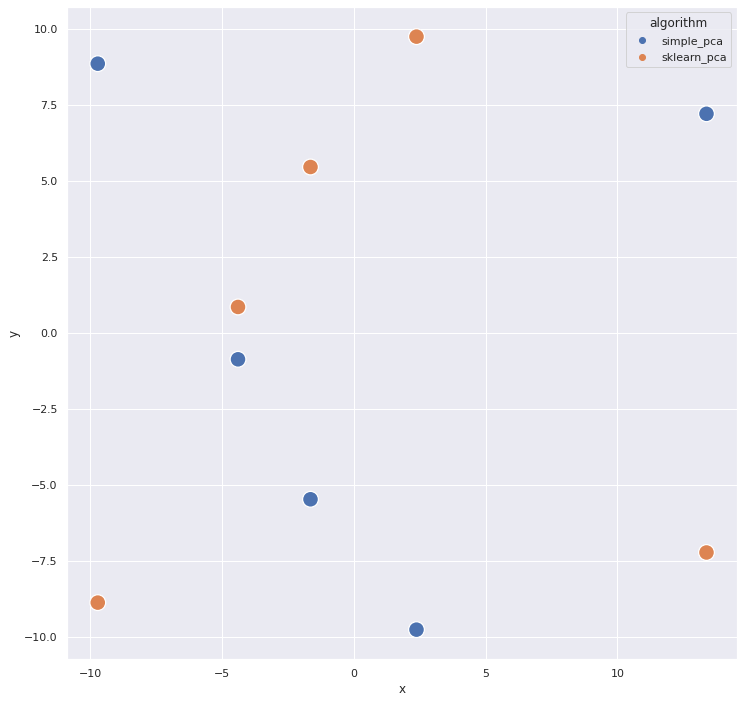

In [9]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(data=df, x="x", y="y", hue="algorithm", s=250)

### Formatação em uma Classe

In [10]:
class MyPCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)


class MyPCAwithSVD:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        unitary_matrix, singular_values, eigen_vectors = np.linalg.svd(X, full_matrices=False)
        max_abs_cols = np.argmax(np.abs(unitary_matrix), axis=0)
        signs = np.sign(unitary_matrix[max_abs_cols, range(unitary_matrix.shape[1])])
        unitary_matrix *= signs
        eigen_vectors *= signs[:, np.newaxis]
        
        self.components = eigen_vectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [11]:
pca = MyPCAwithSVD(2)
pca.fit(M)
print(pca.transform(M))
pca_sklearn = PCA(2)
print(pca_sklearn.fit_transform(M))

[[ 2.37766944  9.75235865]
 [-1.64536267  5.4644004 ]
 [-4.39675371  0.86080231]
 [-9.72010583 -8.86309308]
 [13.38455278 -7.21446829]]
[[ 2.37766944  9.75235865]
 [-1.64536267  5.4644004 ]
 [-4.39675371  0.86080231]
 [-9.72010583 -8.86309308]
 [13.38455278 -7.21446829]]


### Aplicação com Dados para Treinamento

Para analisarmos como aplicar o PCA como um algoritmo de pré processamento utilizaremos a base de dados dos preços de imóveis.

In [12]:
df_raw = pd.read_csv('train.csv')
df = df_raw.drop(columns=['Id'])

Como os dados apresentam valores 'NaN' tando em campos do tipo "object" como em campos tipo numéricos. Vamos fazer uma imputação considerando os valores não declarados como um tipo de informação e os no caso dos valores numéricos vamos inserir a média. \
<br>
O dicionário *meta_data* guarda os valores de codifcação das colunas do tipo "object". Para que seja usada em uma possível classificação futura.

In [13]:
meta_data = {}
for col in df.columns:
    if any(df[col].isnull()):
        if df[col].dtype == float:
            df[col] = df[col].fillna(df[col].mean())
        if df[col].dtype == object:
            df[col] = df[col].fillna('nan')
    if df[col].dtype == object:
        meta_data[col] = {value:index for index, value in enumerate(df[col].unique())}

df.replace(meta_data, inplace= True)

In [14]:
print_dict(meta_data)


MSZoning: 
 | RL: 0
 | RM: 1
 | C (all): 2
 | FV: 3
 | RH: 4

Street: 
 | Pave: 0
 | Grvl: 1

Alley: 
 | nan: 0
 | Grvl: 1
 | Pave: 2

LotShape: 
 | Reg: 0
 | IR1: 1
 | IR2: 2
 | IR3: 3

LandContour: 
 | Lvl: 0
 | Bnk: 1
 | Low: 2
 | HLS: 3

Utilities: 
 | AllPub: 0
 | NoSeWa: 1

LotConfig: 
 | Inside: 0
 | FR2: 1
 | Corner: 2
 | CulDSac: 3
 | FR3: 4

LandSlope: 
 | Gtl: 0
 | Mod: 1
 | Sev: 2

Neighborhood: 
 | CollgCr: 0
 | Veenker: 1
 | Crawfor: 2
 | NoRidge: 3
 | Mitchel: 4
 | Somerst: 5
 | NWAmes: 6
 | OldTown: 7
 | BrkSide: 8
 | Sawyer: 9
 | NridgHt: 10
 | NAmes: 11
 | SawyerW: 12
 | IDOTRR: 13
 | MeadowV: 14
 | Edwards: 15
 | Timber: 16
 | Gilbert: 17
 | StoneBr: 18
 | ClearCr: 19
 | NPkVill: 20
 | Blmngtn: 21
 | BrDale: 22
 | SWISU: 23
 | Blueste: 24

Condition1: 
 | Norm: 0
 | Feedr: 1
 | PosN: 2
 | Artery: 3
 | RRAe: 4
 | RRNn: 5
 | RRAn: 6
 | PosA: 7
 | RRNe: 8

Condition2: 
 | Norm: 0
 | Artery: 1
 | RRNn: 2
 | Feedr: 3
 | PosN: 4
 | PosA: 5
 | RRAn: 6
 | RRAe: 7

BldgType:

In [15]:
display(df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,0,1,0,0,2,...,0,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,0,1,0,0,1,...,0,0,0,0,0,12,2008,0,0,250000


O PCA permite uma análise de quais componentes (autovetores) gerados são os de maior importância, para isso vamos executar uma normalização *zscore* na base de dados e gerar conjuntos de teste e treinamento para avaliarmos o comportamento dos resultados desse método utilizando um algoritmo de regressão.

26


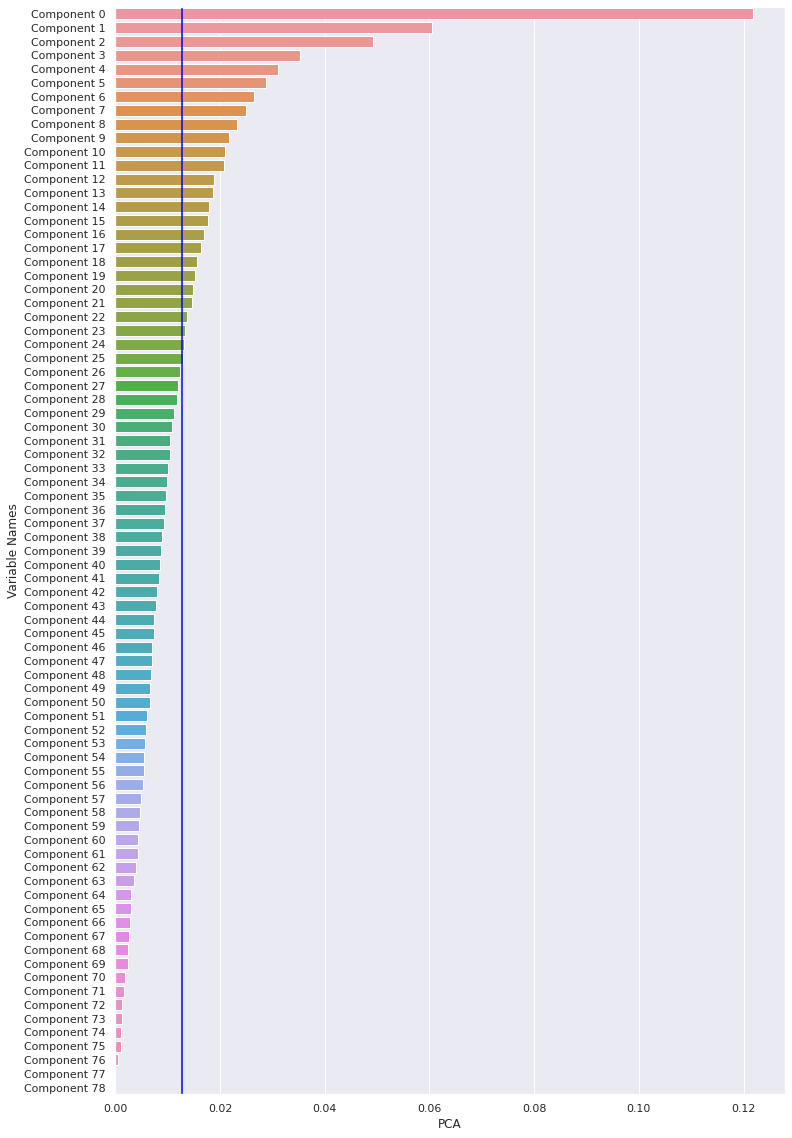

In [17]:
from sklearn.model_selection import train_test_split


target_column_name = 'SalePrice'

df_input = df.loc[:, df.columns != target_column_name]
df_target = df[target_column_name]

df_input_norm = (df_input - df_input.mean())/df_input.std()

X_train, X_test, y_train, y_test = train_test_split(df_input_norm, df_target, test_size=0.20, random_state=42)

pca = PCA()
pca.fit(X_train)
matrix_train_input_pca = pca.transform(X_train)
df_train_input_pca = pd.DataFrame(matrix_train_input_pca)

df_evaluate_components = pd.DataFrame(
    {'PCA':pca.explained_variance_ratio_,
     'Variable Names':[f'Component {i}' for i in range(len(pca.explained_variance_ratio_))]}
)
df_evaluate_components['PCA']=df_evaluate_components['PCA'].apply(np.absolute)
df_evaluate_components = df_evaluate_components.sort_values('PCA', ascending=False)

sns.set(rc={'figure.figsize':(12,20)})
sns.barplot(y="Variable Names", x="PCA", data=df_evaluate_components)
plt.axvline(df_evaluate_components['PCA'].mean(), color='blue')

print(sum((df_evaluate_components['PCA'] > df_evaluate_components['PCA'].mean())*1))

A partir de um *threshold* baseado na média da variância representadas pelos autovalores podemos selecionar os 26 primeiros componentes para tentar reduzir o tempo de treino e manter valores satisfatórios para as métricas.

In [18]:
pca = PCA(n_components = 26)
pca.fit(X_train)
train_pca_filtered = pca.transform(X_train)
test_pca_filtered = pca.transform(X_test)

pca = PCA()
pca.fit(X_train)
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

Para testar a eficiência desse pré-processamento será executado com alguns algoritmos de regressão observando o r2_score e o tempo de execução de cada método.

In [21]:
from xgboost import XGBRegressor
from sklearn.linear_model import ARDRegression, LinearRegression, SGDRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import datetime


def run_estimator(X_train,y_train, X_test, y_test, msg = '' ):
    print(msg)
    dict_models = {'ARDRegression':ARDRegression(),
    'LinearRegression':LinearRegression(),
    'SGDRegressor':SGDRegressor(),
    'XGBRegressor': XGBRegressor(n_estimators=20)}
    for key in dict_models:
        start_time = datetime.now()
        dict_models[key].fit(X_train, y_train)
        print("\tR2 Score {}: {} | Duration: {}".format(
            key, round(metrics.r2_score(dict_models[key].predict(X_test), y_test),5), datetime.now() - start_time))
    
run_estimator(X_train,y_train, X_test, y_test, msg ='Para a base inteira:')
run_estimator(train_pca_filtered, y_train, test_pca_filtered, y_test, msg='Para somente com os componentes selecionadas:')
run_estimator(train_pca, y_train, test_pca, y_test, msg='Para a todas as componentes:')

Para a base inteira:
	R2 Score ARDRegression: 0.7578 | Duration: 0:00:01.774180
	R2 Score LinearRegression: 0.75575 | Duration: 0:00:00.046632
	R2 Score SGDRegressor: 0.78755 | Duration: 0:00:00.089032
	R2 Score XGBRegressor: 0.8249 | Duration: 0:00:00.394695
Para somente com os componentes selecionadas:
	R2 Score ARDRegression: 0.71033 | Duration: 0:00:00.179785
	R2 Score LinearRegression: 0.71642 | Duration: 0:00:00.027697
	R2 Score SGDRegressor: 0.74019 | Duration: 0:00:00.007348
	R2 Score XGBRegressor: 0.83797 | Duration: 0:00:00.194670
Para a todas as componentes:
	R2 Score ARDRegression: 0.74653 | Duration: 0:00:00.922239
	R2 Score LinearRegression: 0.75565 | Duration: 0:00:00.012577
	R2 Score SGDRegressor: 0.73165 | Duration: 0:00:00.029410
	R2 Score XGBRegressor: 0.78041 | Duration: 0:00:00.322307


## Linear Discriminant Analysis
Baseado no mesmo princípio de se trabalhar com as projeções de uma base de dados e determinar uma base vetorial que melhor discrimina as amostras, foi proposto por Ronald A. Fisher um critério de maximização da separação entre duas ou mais classes de amostras que ficou conhecido como Linear Discriminant Analysis (LDA).

Ao contrário do PCA, o LDA é "supervisionado" e calcula as direções ("discriminantes lineares") que irão representar os eixos que maximizam a separação entre várias classes.


<img src="images/lda_1.png" width="50%">



### Algoritmo
<ol>
    <li> Calcular o vetor com as médias de cada dimensão da base para cada classe. </li>
    <li> Calcule as matrizes de dispersão (matriz de dispersão dentro e dentro da classe). </li>
    <li> Calcule os autovetores e os autovalores para as matrizes de dispersão. </li>
    <li> Ordene de maneira decrescente os autovetores a partir dos autovalores. 
        Escolha apenas os $k$ maiores autovalores e seus respectivos autovetores,
        formando uma matriz $W_{d\times k}$ </li>
    <li>Use esta matriz de autovetores $W_{d\times k}$ para transformar as amostras no novo subespaço. Isso pode ser resumido pela multiplicação da matriz: $Y = X_{d \times m} \times W_{d \times k}$</li>
</ol>

### Implementação

In [25]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(SW).dot(SB)

        eigenvalues, eigenvectors = np.linalg.eig(A)

        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)


## Comparação entre PCA e LDA

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


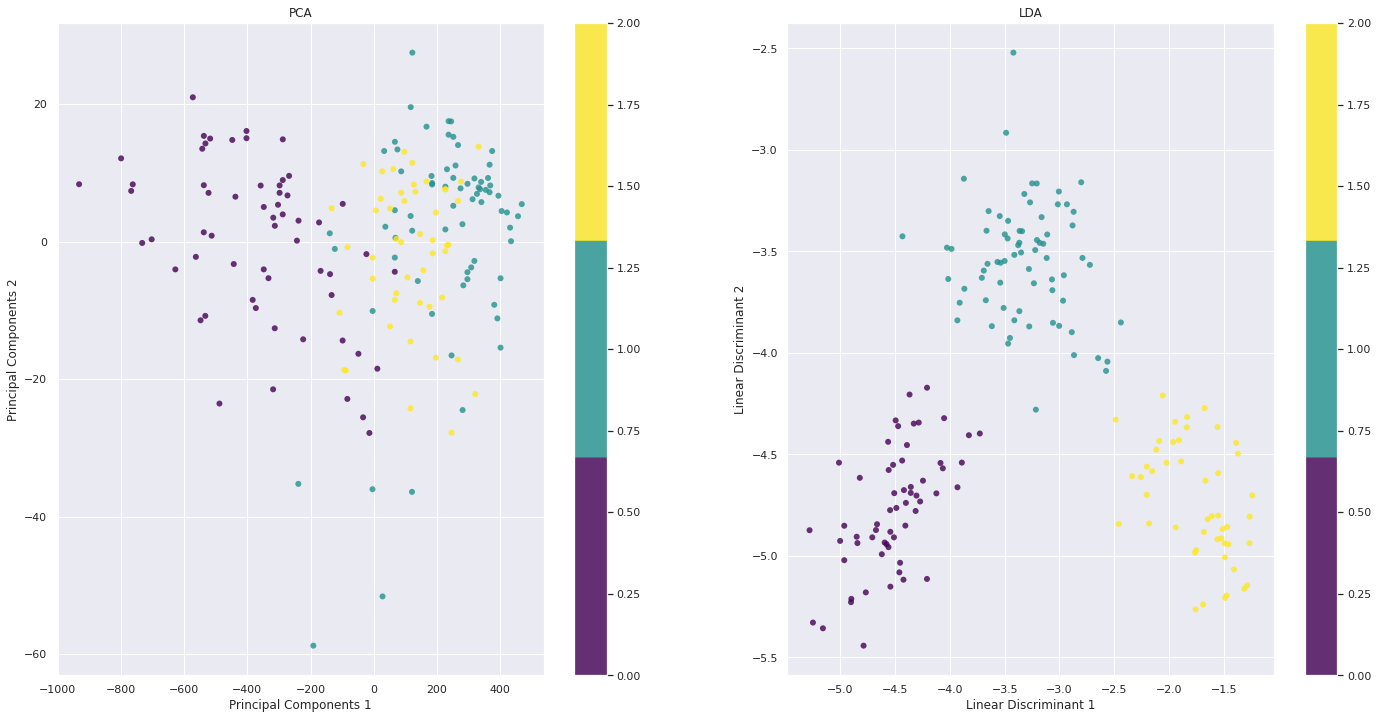

In [31]:
    from sklearn import datasets
    plt.rcParams['figure.figsize'] = [24, 12]
#     data = datasets.load_iris()
    data = datasets.load_wine()
    X, y = data.data, data.target
    
    lda = MyPCAwithSVD(2)
    lda.fit(X)
    X_projected = lda.transform(X)

    x1, x2 = X_projected[:, 0]*-1, X_projected[:, 1]*-1
    plt.subplot(1, 2, 1)
    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", len(np.unique(y)))
    )
    plt.title("PCA")
    plt.xlabel("Principal Components 1")
    plt.ylabel("Principal Components 2")
    plt.colorbar()
    
    plt.subplot(1, 2, 2)
    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", len(np.unique(y)))
    )
    plt.title('LDA')
    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()

## Seleção de Características

O processo de seleção de características consiste na escolha, com base em alguns critérios, de um subconjunto do conjunto original de características do problema que permitam chegar aos mesmos resultados ou pelo menos muito próximos. Entre as vantagens em se utilizar seleção de características, é possível citar o fato de que, após a sua aplicação, a dimensionalidade do espaço representativo do problema é reduzida. Assim, o processo remove atributos redundantes ou irrelevantes. Dentre eles, podemos destacar:
<ul>
    <li>Melhoramento na qualidade do treinamento</li>
    <li>Permite e extração do conhecimento compreensivo e claro</li>
    <li>Otimização da execução dos algoritmos de aprendizagem e consequentemente melhoramento dos resultados</li>
</ul>


<img src='images/rfe.png' width=80%/>

A **definição dos subconjuntos** depende diretamente da implementação, tendo em vista que dada uma base de dados com n características o número possível de subconjuntos é $2^n - 1$ e nos casos de n ser um número muito grande, o quantidade de subconjunto gerados torna a execução do algoritmo inviável.

A **avaliação dos subconjuntos** passa por uma métrica de qualidade dos resultados obtidos a partir de testes feitos por um classificador.

O **critério de parada** consiste em avaliar a melhoria da classificação por parte do subconjunto determinado.

### Implementação

Para os testes do RFE, vamos utilizar a implementação do RFE que usa o *cross validation* que pode ser encontrada na *sklearn*. 

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
df = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin').drop(
    ['subjectid', 'weightkg'], axis=1)

df = df.select_dtypes(include='number')

X, y = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_std = (X_train - X_train.mean() )/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

start = datetime.now()
regressor = RandomForestRegressor().fit(X_train_std, y_train)
print("Treinamento R-squared:", regressor.score(X_train_std, y_train))
print("Teste R-squared:",regressor.score(X_test_std, y_test))
print('Duração: {}'.format(datetime.now() - start))

rfecv = RFECV(
    estimator=LinearRegression(),
    min_features_to_select=5,
    step=6,
    n_jobs=4,
    scoring="r2",
    cv=7,
    verbose=0
)

rfecv.fit(X_train_std, y_train)
start = datetime.now()
regressor_filtered = RandomForestRegressor().fit(X_train_std[X_train.columns[rfecv.support_]], y_train)

print("Treinamento Filtrado R-squared:", regressor_filtered.score(X_train_std[X_train.columns[rfecv.support_]], y_train))
print("Teste Filtrado R-squared:",regressor_filtered.score(X_test_std[X_test.columns[rfecv.support_]], y_test))
print('Duração: {}'.format(datetime.now() - start))

print(f"Quantidade total de features da base de dados:{X_train_std.shape[1]}")
print(f"Quantidade de features não interessantes calculados pelo RFE: {len(X_train.columns[rfecv.support_])}")

Treinamento R-squared: 0.9876099134298922
Teste R-squared: 0.9285785648666112
Duração: 0:00:16.134215
Quantidade total de features da base de dados:96
Quantidade de features não interessantes calculados pelo RFE: 42
Treinamento Filtrado R-squared: 0.9871631519372873
Teste Filtrado R-squared: 0.9301662503796524
Duração: 0:00:07.749828


## Seleção de Características utilizando Random Forrest

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = [16, 8]
df = pd.read_csv('bank_customer_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
le = LabelEncoder()
for col in df.columns[ [i == object for i in df.dtypes] ]:
    df.loc[:,col] = le.fit_transform(df[col])
    
y = df['term_deposit']
df.drop(columns=['term_deposit'], inplace=True)

df = (df - df.mean())/df.std()

clf = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=42)
clf.fit(df, y)

sorted_idx = clf.feature_importances_.argsort()

y_ticks = np.arange(0, len(df.columns))
fig, ax = plt.subplots()
ax.barh(y_ticks, clf.feature_importances_[sorted_idx])
ax.set_yticklabels(df.columns[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.axvline(clf.feature_importances_.mean().mean(), 0, 1, linestyle='--', color='red')

In [ ]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15, random_state=42)

columns_selected = df.columns[clf.feature_importances_ > clf.feature_importances_.mean()].to_list()

for classifier in [KNeighborsClassifier(), AdaBoostClassifier(), DecisionTreeClassifier(), 
                   XGBClassifier(objective = "reg:squarederror", eval_metric = "auc", use_label_encoder=False)]:
    start_time = datetime.now()
    clf_full_data = clone(classifier)
    clf_full_data.fit(X_train, y_train)
    elapse_time_without_rf = datetime.now() - start_time

    a = X_train[columns_selected]
    start_time = datetime.now()
    clf_with_filtered_data = clone(classifier)
    clf_with_filtered_data.fit(a, y_train)
    elapse_time_with_rf = datetime.now() - start_time

    print("\033[1m"+type(classifier).__name__ + ' \033[0m')
    print('\033[1m \t Somente dados Selecionados: \033[0m')
    print(reindent(classification_report(y_test, clf_with_filtered_data.predict(X_test[columns_selected])), 8) )
    print('\033[1m \t Toda a base: \033[0m')
    print(reindent(classification_report(y_test, clf_full_data.predict(X_test)), 8) )